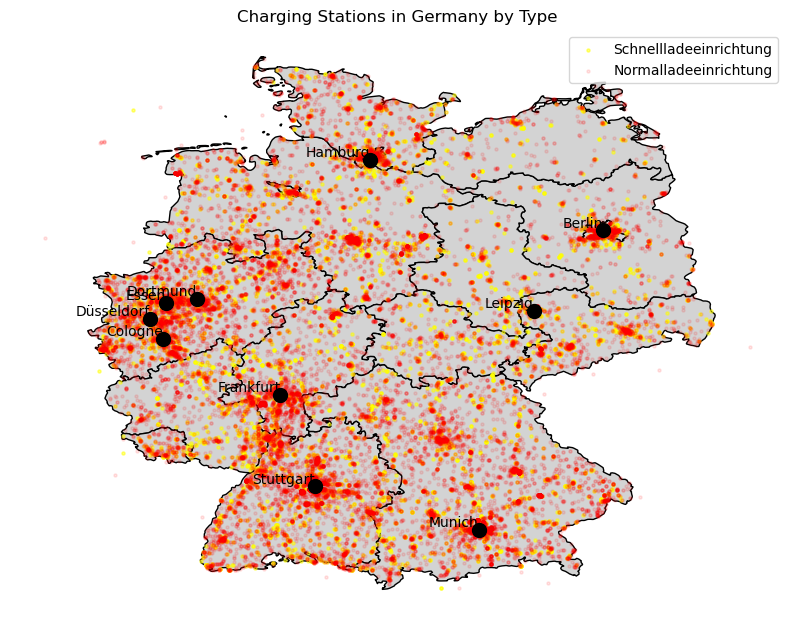

In [18]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# GER map
GER_map = gpd.read_file('vg2500_bld.shp')

# read csv file containing charging data
charging_data = pd.read_csv('charging_data.csv')

# convert column in  Datetime-Format
charging_data['inbetriebnahmedatum'] = pd.to_datetime(charging_data['inbetriebnahmedatum'])

# Filter for fast charging stations
fast_charging_data = charging_data[charging_data['art_der_ladeeinrichung'] == 'Schnellladeeinrichtung']

# Filter for normal charging stations
normal_charging_data = charging_data[charging_data['art_der_ladeeinrichung'] == 'Normalladeeinrichtung']

# convert GeoDataFRame
fast_charging_geodf = gpd.GeoDataFrame(fast_charging_data, geometry=gpd.points_from_xy(fast_charging_data.laengengrad, fast_charging_data.breitengrad))
normal_charging_geodf = gpd.GeoDataFrame(normal_charging_data, geometry=gpd.points_from_xy(normal_charging_data.laengengrad, normal_charging_data.breitengrad))

# GER map
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
GER_map.plot(ax=ax, color='lightgrey', edgecolor='black')

# plotting fast charging stations in yellow
fast_charging_geodf.plot(ax=ax, color='yellow', markersize=5, alpha=0.5, label='Schnellladeeinrichtung')

# plotting fast charging stations in red
normal_charging_geodf.plot(ax=ax, color='red', markersize=5, alpha=0.1, label='Normalladeeinrichtung')

# 10 largest cities GER (coordinates)
cities = {
    'Berlin': (13.4049, 52.5200),
    'Hamburg': (9.9937, 53.5511),
    'Munich': (11.5819, 48.1351),
    'Cologne': (6.9603, 50.9375),
    'Frankfurt': (8.6821, 50.1109),
    'Stuttgart': (9.1829, 48.7758),
    'Düsseldorf': (6.7735, 51.2277),
    'Dortmund': (7.4686, 51.5136),
    'Essen': (7.0117, 51.4556),
    'Leipzig': (12.3874, 51.3438)
}

# Plotting 10 largest cities GER on map
for city, coords in cities.items():
    ax.plot(coords[0], coords[1], marker='o', color='black', markersize=10)
    ax.text(coords[0], coords[1], city, fontsize=10, ha='right', va='bottom')

# Title / axis off / ceate legend
plt.title('Charging Stations in Germany by Type')
plt.axis("off")
plt.legend()
plt.show()

